##      **Musical Instrument Classification**

# Downloading the Dataset
First, we need to install the Kaggle API and authenticate it to download the "Musical Instrument Classification" dataset.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d gpiosenka/musical-instruments-image-classification
!unzip musical-instruments-image-classification.zip -d musical_instruments_dataset

Streaming output truncated to the last 5000 lines.
  inflating: musical_instruments_dataset/test/harmonica/4.jpg  
  inflating: musical_instruments_dataset/test/harmonica/5.jpg  
  inflating: musical_instruments_dataset/test/harp/1.jpg  
  inflating: musical_instruments_dataset/test/harp/2.jpg  
  inflating: musical_instruments_dataset/test/harp/3.jpg  
  inflating: musical_instruments_dataset/test/harp/4.jpg  
  inflating: musical_instruments_dataset/test/harp/5.jpg  
  inflating: musical_instruments_dataset/test/marakas/1.jpg  
  inflating: musical_instruments_dataset/test/marakas/2.jpg  
  inflating: musical_instruments_dataset/test/marakas/3.jpg  
  inflating: musical_instruments_dataset/test/marakas/4.jpg  
  inflating: musical_instruments_dataset/test/marakas/5.jpg  
  inflating: musical_instruments_dataset/test/ocarina/1.jpg  
  inflating: musical_instruments_dataset/test/ocarina/2.jpg  
  inflating: musical_instruments_dataset/test/ocarina/3.jpg  
  inflating: musical_instrumen

# Creating CSV files for train and test dataset :-

we are pre-processing the data and creating train_data.csv  and test_data.csv file with columns image_path and label for further processing:-


In [3]:
import os
import pandas as pd

# Directories for train and validation datasets
train_dir = '/content/musical_instruments_dataset/train'
valid_dir = '/content/musical_instruments_dataset/valid'

# Initialize lists to hold image paths and labels
image_paths = []
labels = []

# Function to process each directory (train or valid)
def process_directory(directory, label_list, path_list):
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for image_name in os.listdir(label_dir):
                if image_name.endswith('.jpg') or image_name.endswith('.png'):
                    image_path = os.path.join(label_dir, image_name)
                    path_list.append(image_path)
                    label_list.append(label)

# Process the train and valid directories
process_directory(train_dir, labels, image_paths)
process_directory(valid_dir, labels, image_paths)

# Create DataFrame and save to CSV
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

csv_file_path = '/content/musical_instruments_dataset/train_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV file for train and valid folders saved successfully!")

CSV file for train and valid folders saved successfully!


In [4]:
import os
import pandas as pd

# Directory for test dataset
test_dir = '/content/musical_instruments_dataset/test'

# Initialize lists to hold image paths and labels
test_image_paths = []
test_labels = []

# Function to recursively process the test directory
def process_test_directory(directory, label_list, path_list):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                image_path = os.path.join(root, file)
                path_list.append(image_path)
                label_list.append("Unknown")

# Process the test directory
process_test_directory(test_dir, test_labels, test_image_paths)

# Create DataFrame and save to CSV
test_data = {'Image_Path': test_image_paths, 'Label': test_labels}
test_df = pd.DataFrame(test_data)

test_csv_file_path = '/content/musical_instruments_dataset/test_data.csv'
test_df.to_csv(test_csv_file_path, index=False)

print("CSV file for test folder saved successfully!")

CSV file for test folder saved successfully!


# Importing Libraries :-

we need to import machine learning related API's for image processing , manipulating layers and model Xception , VGG16 and ResNet50 with pre-trained weights , pandas for reading csv files into dataframes and Matplotlib for creating visualizations, such as line plots, bar charts :-

In [27]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception  , DenseNet121 , ResNet50 , MobileNetV2  , InceptionV3
from keras import layers, models, optimizers

# Creating Data Generators for Image Classification
This code snippet summarizes the process of creating data generators for training and validation sets . It includes setting up image data augmentation for the training set (train_datagen) and scaling for the testing set (test_datagen), defining the batch size and target image size, and loading the dataset using the flow_from_directory method with categorical class mode for image classification tasks.

In [13]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/musical_instruments_dataset/train_data.csv')

train_df, val_df = train_test_split(df, train_size=0.9, test_size=0.1, random_state=42)
num_classes = len(df['Label'].unique())
print(num_classes)

30


In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)

In [15]:

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 4448 validated image filenames belonging to 30 classes.
Found 495 validated image filenames belonging to 30 classes.


# Exploratory Data Analysis

In [16]:
# Understand the dataset
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                             Image_Path     Label
3946  /content/musical_instruments_dataset/train/cla...  clarinet
1871  /content/musical_instruments_dataset/train/tro...  trombone
1371  /content/musical_instruments_dataset/train/har...      harp
3557  /content/musical_instruments_dataset/train/aco...  acordian
907   /content/musical_instruments_dataset/train/bag...  bagpipes
(4448, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 4448 entries, 3946 to 860
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  4448 non-null   object
 1   Label       4448 non-null   object
dtypes: object(2)
memory usage: 104.2+ KB
None
                                               Image_Path       Label
count                                                4448        4448
unique                                               4448          30
top     /content/musical_instruments_dataset/train/Tam...  Tambourine
freq

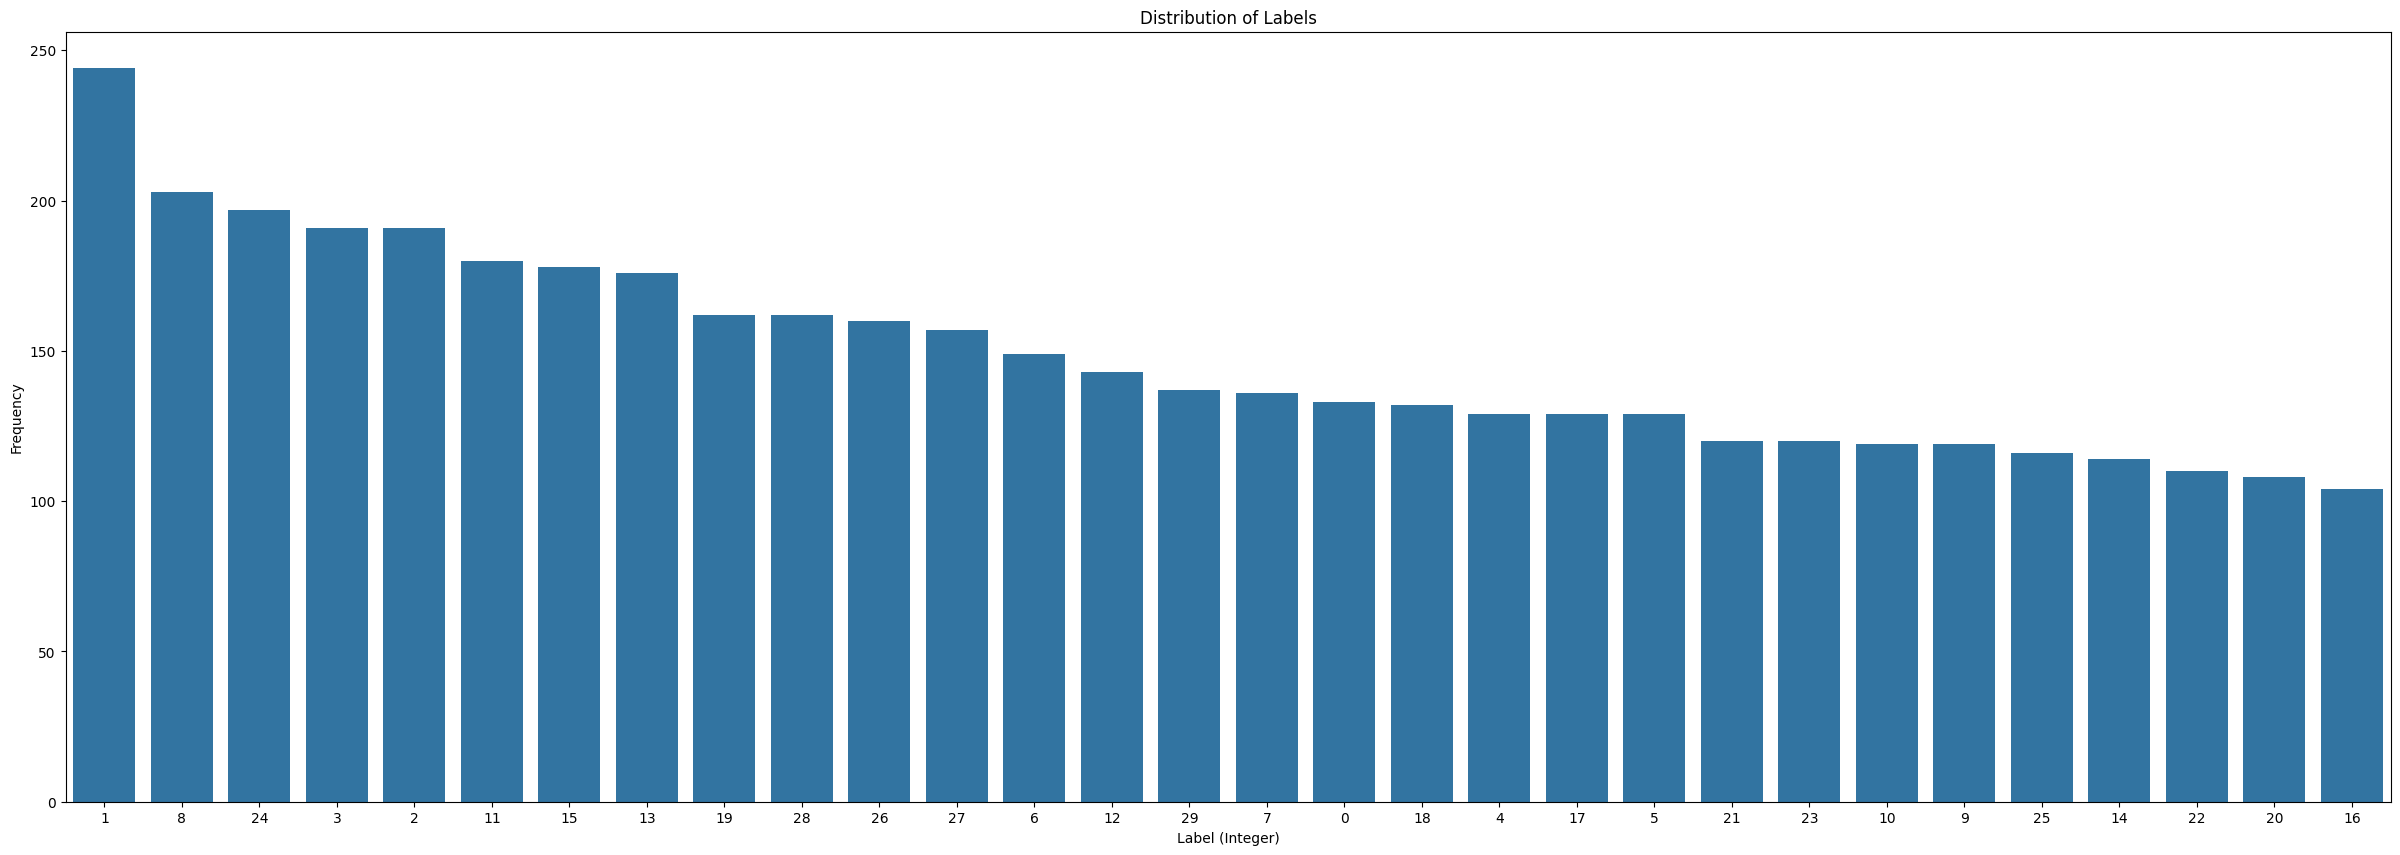

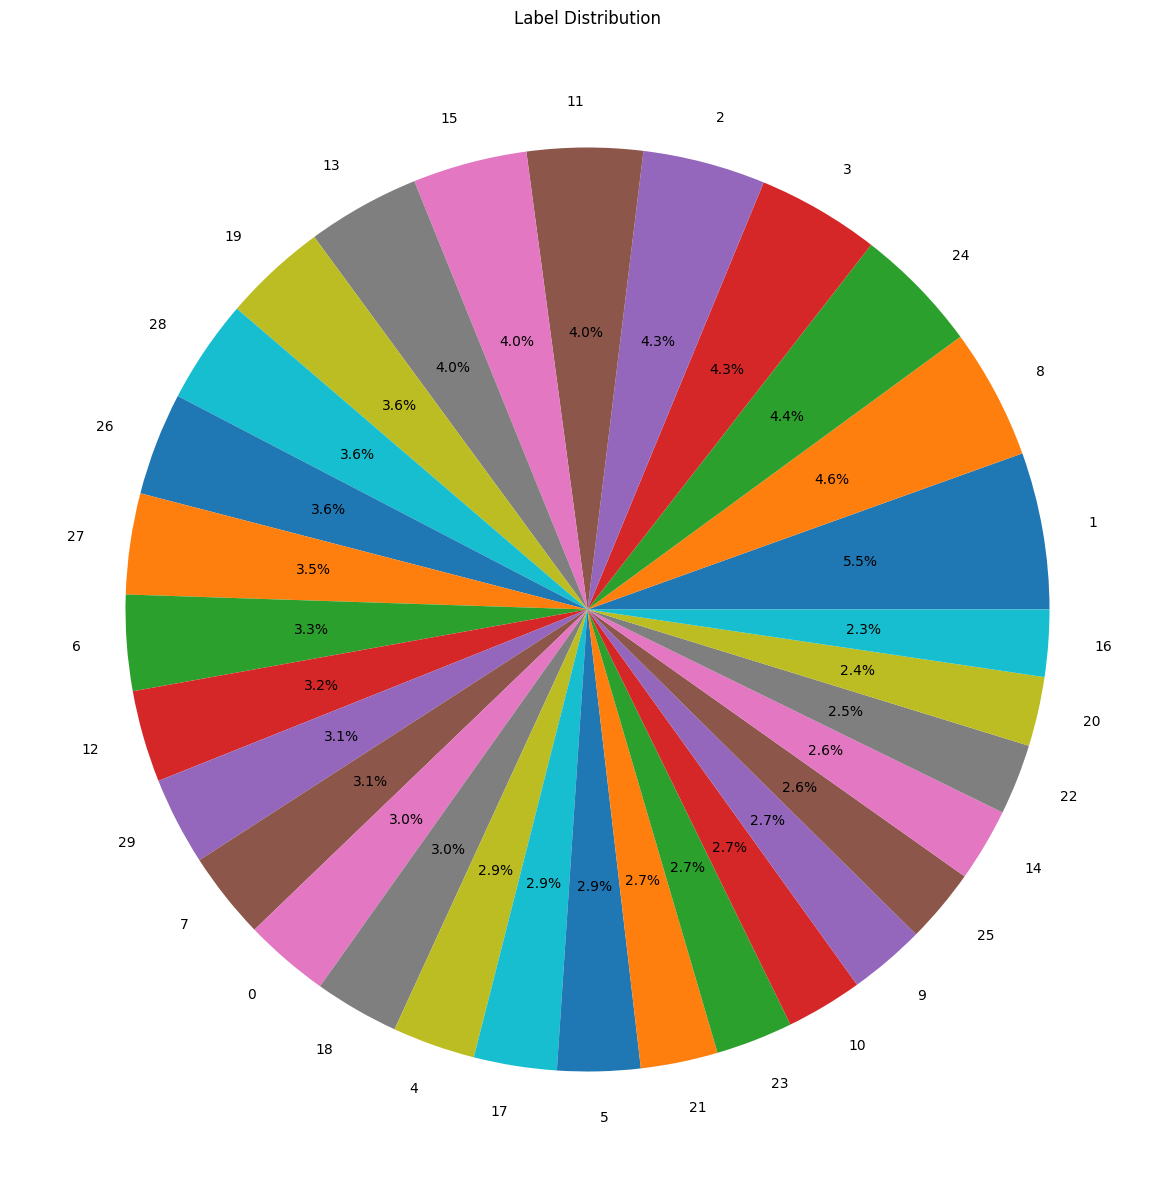

In [19]:
labels_csv_path = '/content/musical_instruments_dataset/class_dict.csv'
labels_df = pd.read_csv(labels_csv_path)

# Convert the labels dataframe to a dictionary for easy lookup
label_to_int = dict(zip(labels_df.iloc[:, 1], labels_df.iloc[:, 0]))

# Map string labels to integer labels in train_df
train_df['Label_Int'] = train_df['Label'].map(label_to_int)

# Bar chart for label distribution
plt.figure(figsize=(30, 10))
sns.countplot(data=train_df, x='Label_Int', order=train_df['Label_Int'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Label (Integer)')
plt.ylabel('Frequency')
plt.show()

# Pie chart for label distribution
plt.figure(figsize=(15, 15))
train_df['Label_Int'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

Number of unique image paths: 4448


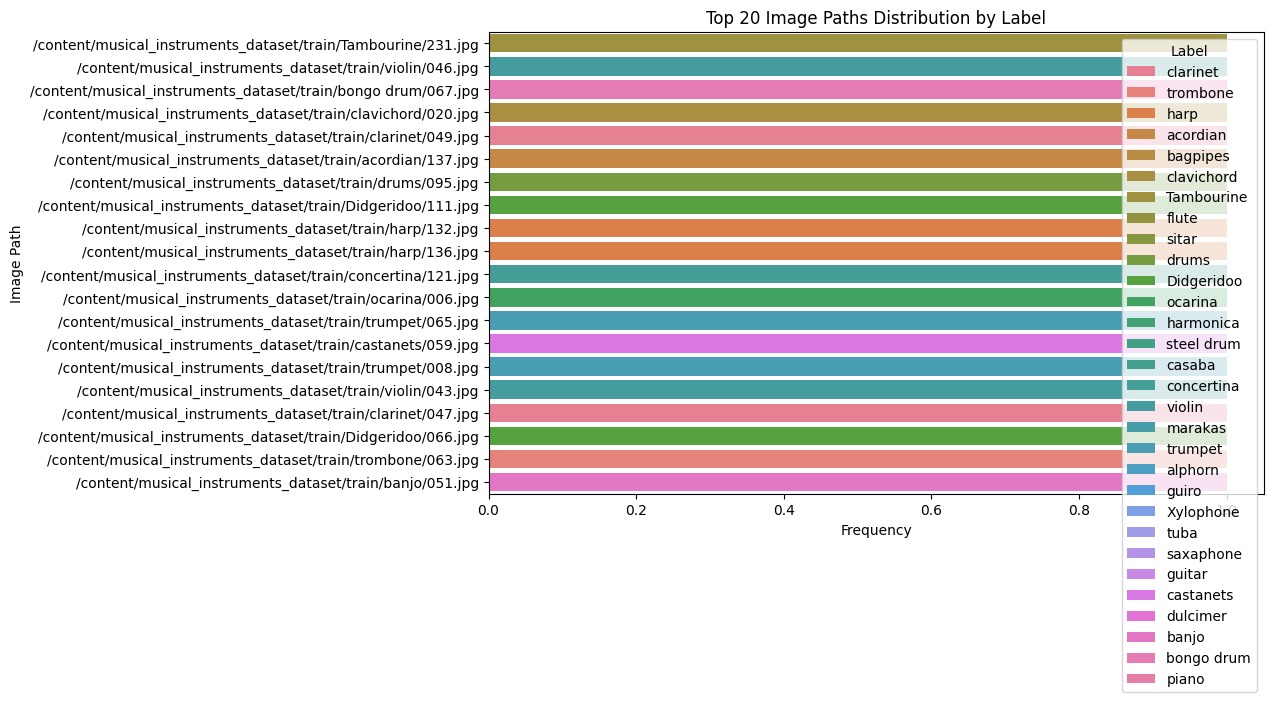

Column Image_Path has 4448 unique values.
Column Label has 30 unique values.


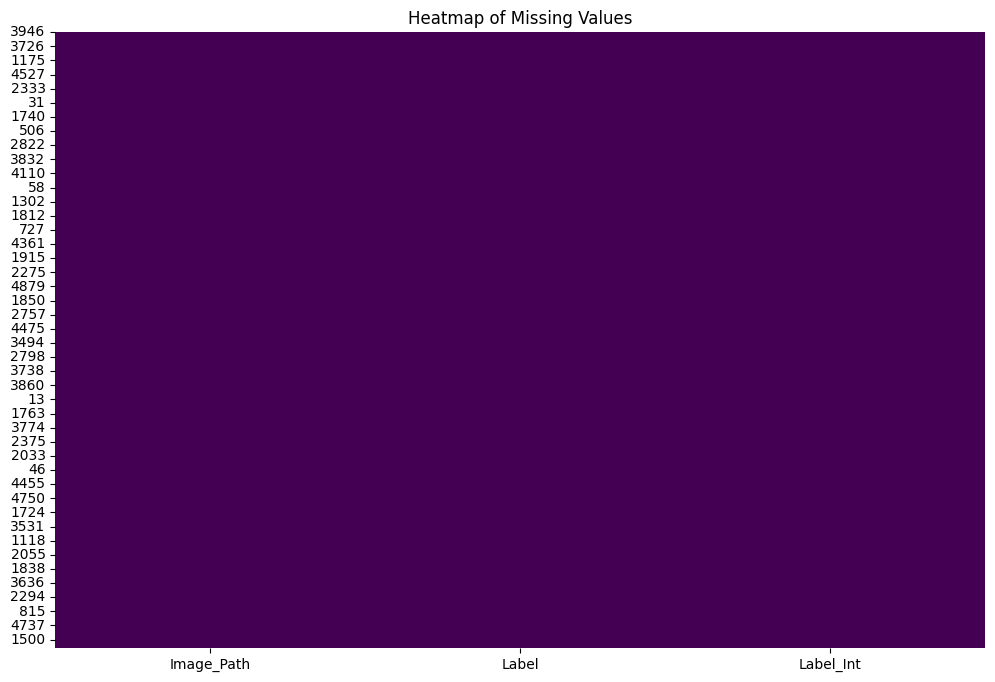

Label
Tambourine    244
casaba        203
sitar         197
acordian      191
Xylophone     191
clavichord    180
flute         178
drums         176
harp          162
tuba          162
trombone      160
trumpet       157
banjo         149
concertina    143
violin        137
bongo drum    136
Didgeridoo    133
harmonica     132
alphorn       129
guitar        129
bagpipes      129
ocarina       120
saxaphone     120
clarinet      119
castanets     119
steel drum    116
dulcimer      114
piano         110
marakas       108
guiro         104
Name: count, dtype: int64


In [20]:
# Count unique image paths
unique_paths = train_df['Image_Path'].nunique()
print(f"Number of unique image paths: {unique_paths}")

# Image paths distribution by label (top 20 paths for readability)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, y='Image_Path', hue='Label', order=train_df['Image_Path'].value_counts().index[:20])
plt.title('Top 20 Image Paths Distribution by Label')
plt.xlabel('Frequency')
plt.ylabel('Image Path')
plt.show()

# Unique values for each categorical column
for column in train_df.select_dtypes(include=['object']).columns:
    unique_values = train_df[column].nunique()
    print(f"Column {column} has {unique_values} unique values.")

# Missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Label counts summary
label_counts = train_df['Label'].value_counts()
print(label_counts)

In [21]:
# Data Cleaning
print(train_df.isnull().sum())
train_df.fillna(method='ffill', inplace=True)
print(train_df.duplicated().sum())
train_df.drop_duplicates(inplace=True)

Image_Path    0
Label         0
Label_Int     0
dtype: int64
0


# Customizing model according to our usecase
This code snippet summarizes the process of creating a custom keras categorical classification model in Keras. It involves loading the pre-trained Xception , VGG16 and ResNet50  model, freezing its layers, adding custom layers for classification, compiling the model, shuffling the training data, and training the model. Finally, the trained model is saved as an HDF5 file .

In [22]:
from keras import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D

from keras.layers import Dropout

def create_model(base_model, input_shape, num_classes):
    base_model.trainable = True  # Unfreeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [35]:
from keras.callbacks import EarlyStopping
def train_and_evaluate(model, train_data, val_data, model_name, epochs=10):
    # Compile the model
    model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with the specified number of epochs
    history = model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=epochs,
                        callbacks=[early_stopping])

    # Evaluate the model
    val_accuracy = history.history['val_accuracy'][-1]
    print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

    # Plot training history
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Accuracy')
    plt.show()

    return history

In [39]:
def model_training (base_models):
  # Directory to save the models
  save_dir = 'saved_models'
  if not os.path.exists(save_dir):
      os.makedirs(save_dir)

  # Adjustments for ResNet50
  # Train and evaluate each model
  histories = {}
  for base_model, input_shape, model_name in base_models:
      # Resize data if necessary (dummy data, so not applicable here)
      if input_shape != (224, 224, 3):
          # Resize X_train and X_val to the required input_shape
          # This is just a placeholder, implement actual resizing if needed
          pass

      # Create the model
      model = create_model(base_model, input_shape, num_classes)

      if model_name == 'ResNet50':
          # Unfreeze more layers for ResNet50 and adjust learning rate
          for layer in model.layers[-30:]:
              layer.trainable = True
          epochs = 20
          optimizer = optimizers.Adam(learning_rate=0.0001)
      else:
          epochs = 13
          optimizer = optimizers.Adam()

      # Compile the model
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

      print(f'Training {model_name}...')
      history = train_and_evaluate(model, train_generator, validation_generator, model_name, epochs=epochs)
      histories[model_name] = history

      # Saving the model after training
      model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
      print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

# Loading the Base-Model
This code snippet defines Xception , ResNet50 and VGG16 base model in Keras. The model is configured with an input shape of (224, 224, 3) for VGG16 & ResNet50 and input shape of (299 , 299 , 3) for Xception to match the size and channels of the images in the dataset. It includes all layers of the MobileNetV2 model up to the final fully connected layers but excludes the last fully connected layer, which is often customized for specific tasks.

Training ResNet50...
Epoch 1/20
139/139 [==============================] - 107s 555ms/step - loss: 2.3937 - accuracy: 0.3586 - val_loss: 3.4427 - val_accuracy: 0.0444
Epoch 2/20
139/139 [==============================] - 79s 568ms/step - loss: 0.8154 - accuracy: 0.7799 - val_loss: 3.3535 - val_accuracy: 0.0646
Epoch 3/20
139/139 [==============================] - 78s 558ms/step - loss: 0.4575 - accuracy: 0.8802 - val_loss: 3.0518 - val_accuracy: 0.2020
Epoch 4/20
139/139 [==============================] - 77s 554ms/step - loss: 0.3737 - accuracy: 0.9076 - val_loss: 1.7162 - val_accuracy: 0.5838
Epoch 5/20
139/139 [==============================] - 77s 549ms/step - loss: 0.2964 - accuracy: 0.9256 - val_loss: 0.8372 - val_accuracy: 0.7838
Epoch 6/20
139/139 [==============================] - 77s 550ms/step - loss: 0.2670 - accuracy: 0.9328 - val_loss: 0.6266 - val_accuracy: 0.8687
Epoch 7/20
139/139 [==============================] - 76s 546ms/step - loss: 0.2153 - accuracy: 0.9492 - val

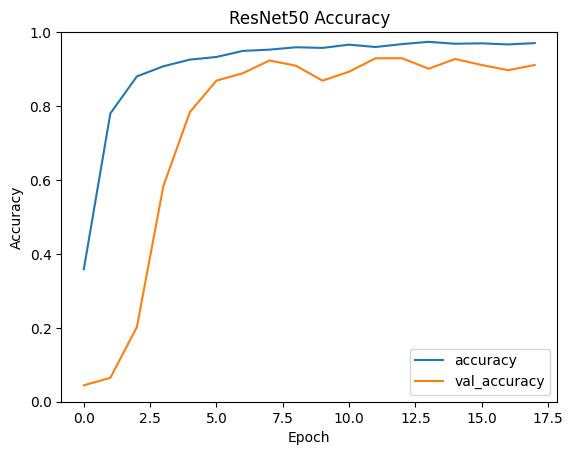

Saved ResNet50 model to saved_models/ResNet50_saved.h5


In [37]:
# List of base models with their respective input shapes
base_models1 = [
    (ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3),'ResNet50'),
]
model_training (base_models1)

Training InceptionV3...
Epoch 1/13
139/139 [==============================] - 102s 512ms/step - loss: 2.3280 - accuracy: 0.3806 - val_loss: 0.5003 - val_accuracy: 0.8626
Epoch 2/13
139/139 [==============================] - 72s 513ms/step - loss: 0.7285 - accuracy: 0.8127 - val_loss: 0.2673 - val_accuracy: 0.9172
Epoch 3/13
139/139 [==============================] - 69s 499ms/step - loss: 0.4048 - accuracy: 0.8957 - val_loss: 0.2669 - val_accuracy: 0.9293
Epoch 4/13
139/139 [==============================] - 69s 498ms/step - loss: 0.2925 - accuracy: 0.9303 - val_loss: 0.2689 - val_accuracy: 0.9354
Epoch 5/13
139/139 [==============================] - 70s 501ms/step - loss: 0.2494 - accuracy: 0.9382 - val_loss: 0.2577 - val_accuracy: 0.9293
Epoch 6/13
139/139 [==============================] - 70s 501ms/step - loss: 0.2275 - accuracy: 0.9492 - val_loss: 0.2589 - val_accuracy: 0.9253
Epoch 7/13
139/139 [==============================] - 71s 510ms/step - loss: 0.1701 - accuracy: 0.9595 - 

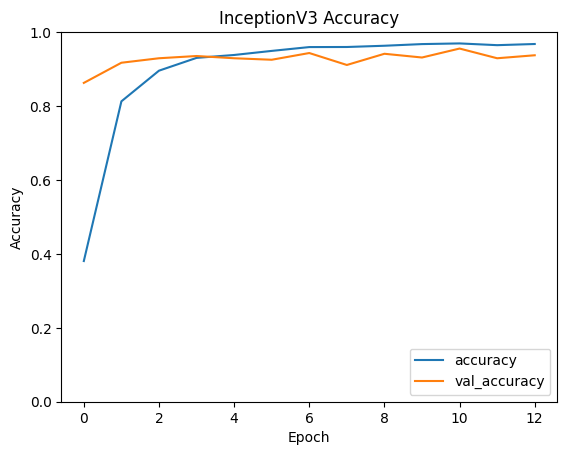

Saved InceptionV3 model to saved_models/InceptionV3_saved.h5


In [40]:
base_models2 = [
  (InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'InceptionV3')
]
model_training (base_models2)

83683744/83683744 [==============================] - 0s 0us/step
Training Xception...
Epoch 1/13
139/139 [==============================] - 120s 632ms/step - loss: 2.3616 - accuracy: 0.3793 - val_loss: 0.4943 - val_accuracy: 0.8606
Epoch 2/13
139/139 [==============================] - 85s 606ms/step - loss: 0.6607 - accuracy: 0.8260 - val_loss: 0.2332 - val_accuracy: 0.9273
Epoch 3/13
139/139 [==============================] - 86s 614ms/step - loss: 0.2827 - accuracy: 0.9285 - val_loss: 0.1511 - val_accuracy: 0.9535
Epoch 4/13
139/139 [==============================] - 84s 600ms/step - loss: 0.1627 - accuracy: 0.9571 - val_loss: 0.1307 - val_accuracy: 0.9596
Epoch 5/13
139/139 [==============================] - 84s 601ms/step - loss: 0.1133 - accuracy: 0.9730 - val_loss: 0.1530 - val_accuracy: 0.9535
Epoch 6/13
139/139 [==============================] - 84s 605ms/step - loss: 0.0909 - accuracy: 0.9782 - val_loss: 0.1617 - val_accuracy: 0.9576
Epoch 7/13
139/139 [=======================

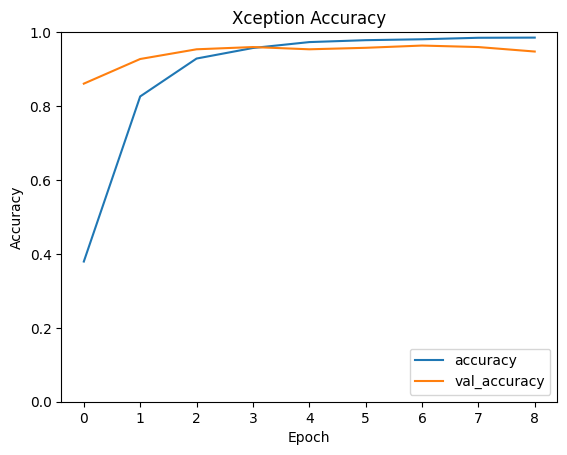

Saved Xception model to saved_models/Xception_saved.h5


In [41]:
base_models3 = [
  (Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)), (299, 299, 3), 'Xception')
]
model_training (base_models3)

9406464/9406464 [==============================] - 0s 0us/step
Training MobileNetV2...
Epoch 1/13
139/139 [==============================] - 93s 465ms/step - loss: 2.9538 - accuracy: 0.2100 - val_loss: 1.4784 - val_accuracy: 0.6869
Epoch 2/13
139/139 [==============================] - 63s 455ms/step - loss: 1.3787 - accuracy: 0.6133 - val_loss: 0.5587 - val_accuracy: 0.8222
Epoch 3/13
139/139 [==============================] - 61s 442ms/step - loss: 0.7212 - accuracy: 0.7965 - val_loss: 0.3874 - val_accuracy: 0.8788
Epoch 4/13
139/139 [==============================] - 63s 450ms/step - loss: 0.4625 - accuracy: 0.8725 - val_loss: 0.2848 - val_accuracy: 0.9192
Epoch 5/13
139/139 [==============================] - 62s 444ms/step - loss: 0.3366 - accuracy: 0.9013 - val_loss: 0.3007 - val_accuracy: 0.9131
Epoch 6/13
139/139 [==============================] - 64s 457ms/step - loss: 0.2758 - accuracy: 0.9209 - val_loss: 0.2677 - val_accuracy: 0.9293
Epoch 7/13
139/139 [=======================

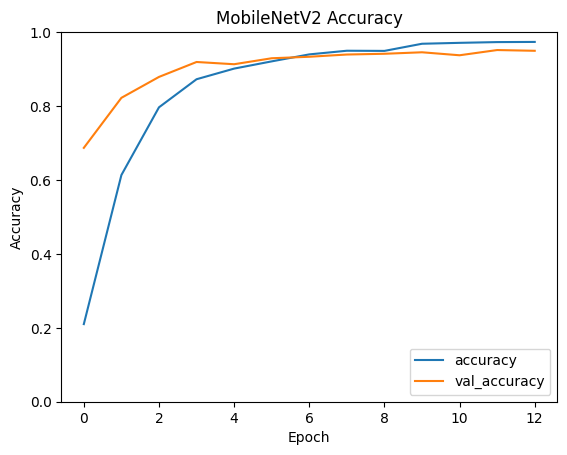

Saved MobileNetV2 model to saved_models/MobileNetV2_saved.h5


In [42]:
base_models4 = [
  (MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'MobileNetV2')
]
model_training (base_models4)

Training DenseNet121...
Epoch 1/13
139/139 [==============================] - 155s 602ms/step - loss: 2.8356 - accuracy: 0.2469 - val_loss: 1.1473 - val_accuracy: 0.7636
Epoch 2/13
139/139 [==============================] - 78s 559ms/step - loss: 1.2168 - accuracy: 0.6677 - val_loss: 0.2844 - val_accuracy: 0.9212
Epoch 3/13
139/139 [==============================] - 77s 551ms/step - loss: 0.6342 - accuracy: 0.8251 - val_loss: 0.2348 - val_accuracy: 0.9313
Epoch 4/13
139/139 [==============================] - 77s 549ms/step - loss: 0.3901 - accuracy: 0.9024 - val_loss: 0.2431 - val_accuracy: 0.9333
Epoch 5/13
139/139 [==============================] - 78s 564ms/step - loss: 0.2970 - accuracy: 0.9220 - val_loss: 0.1672 - val_accuracy: 0.9556
Epoch 6/13
139/139 [==============================] - 78s 561ms/step - loss: 0.2183 - accuracy: 0.9413 - val_loss: 0.2179 - val_accuracy: 0.9414
Epoch 7/13
139/139 [==============================] - 79s 569ms/step - loss: 0.1804 - accuracy: 0.9494 - 

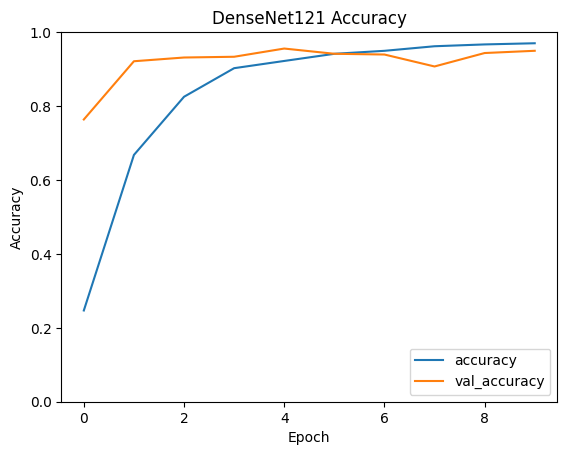

Saved DenseNet121 model to saved_models/DenseNet121_saved.h5


In [43]:
# List of base models with their respective input shapes
base_models5 = [
   (DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3)), (224, 224, 3), 'DenseNet121')
]
model_training (base_models5)

# Testing and labeling unseen data

In [44]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image

# Load test dataset
test_df = pd.read_csv('/content/musical_instruments_dataset/test_data.csv')

# Load class indices (assuming you have train_generator with class indices saved)
class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

# Directory containing the saved models
model_dir = '/content/saved_models'

# Define batch size
batch_size = 32

# Function to process images in batches
def process_images_in_batches(image_paths, model, target_size, batch_size):
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate number of batches

    all_predictions = []

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)
        batch_paths = image_paths[start_idx:end_idx]

        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = img / 255.0
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_predictions_probs = model.predict(batch_images)
        batch_predictions = np.argmax(batch_predictions_probs, axis=1)

        all_predictions.extend(batch_predictions)

    return all_predictions

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine target size based on model
        if "Xception_saved" in model_file or "InceptionV3_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Process images in batches and make predictions
        image_paths = test_df['Image_Path'].tolist()
        prediction = process_images_in_batches(image_paths, model, target_size, batch_size)

        # Map predictions to class labels
        prediction_labels = [class_indices_inverse[label] for label in prediction]

        # Create a DataFrame with predictions
        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'Label': prediction_labels,
        })

        # Save predictions to CSV
        csv_path = f'/content/saved_models/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")

1/1 [==============================] - 2s 2s/step
Predictions saved to /content/saved_models/predicted_MobileNetV2_saved.csv
1/1 [==============================] - 3s 3s/step
Predictions saved to /content/saved_models/predicted_ResNet50_saved.csv


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 6s 6s/step
Predictions saved to /content/saved_models/predicted_DenseNet121_saved.csv
1/1 [==============================] - 5s 5s/step
Predictions saved to /content/saved_models/predicted_Xception_saved.csv
1/1 [==============================] - 5s 5s/step
Predictions saved to /content/saved_models/predicted_InceptionV3_saved.csv


In [45]:
print(test_df)

                                            Image_Path    Label
0    /content/musical_instruments_dataset/test/guir...  Unknown
1    /content/musical_instruments_dataset/test/guir...  Unknown
2    /content/musical_instruments_dataset/test/guir...  Unknown
3    /content/musical_instruments_dataset/test/guir...  Unknown
4    /content/musical_instruments_dataset/test/guir...  Unknown
..                                                 ...      ...
145  /content/musical_instruments_dataset/test/saxa...  Unknown
146  /content/musical_instruments_dataset/test/saxa...  Unknown
147  /content/musical_instruments_dataset/test/saxa...  Unknown
148  /content/musical_instruments_dataset/test/saxa...  Unknown
149  /content/musical_instruments_dataset/test/saxa...  Unknown

[150 rows x 2 columns]


# image label and prediction and visualization

Predictions using model: MobileNetV2_saved
1/1 [==============================] - 1s 850ms/step


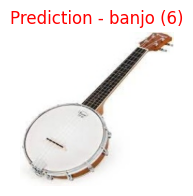

1/1 [==============================] - 0s 23ms/step


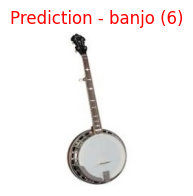

1/1 [==============================] - 0s 24ms/step


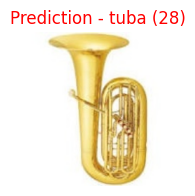

1/1 [==============================] - 0s 24ms/step


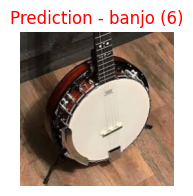

1/1 [==============================] - 0s 22ms/step


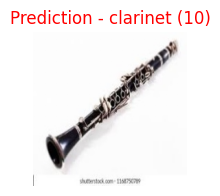

1/1 [==============================] - 0s 23ms/step


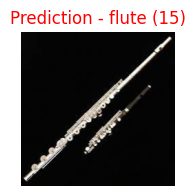

Predictions using model: ResNet50_saved
1/1 [==============================] - 1s 968ms/step


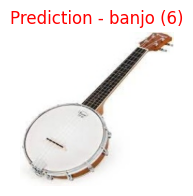

1/1 [==============================] - 0s 24ms/step


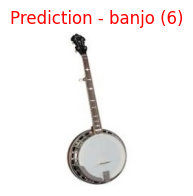

1/1 [==============================] - 0s 23ms/step


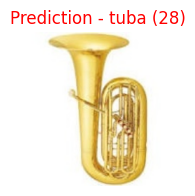

1/1 [==============================] - 0s 23ms/step


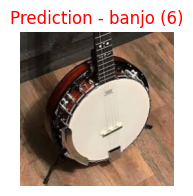

1/1 [==============================] - 0s 23ms/step


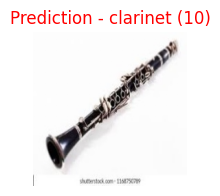

1/1 [==============================] - 0s 30ms/step


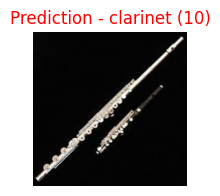

Predictions using model: DenseNet121_saved
1/1 [==============================] - 2s 2s/step


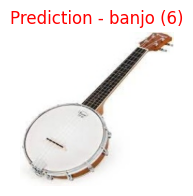

1/1 [==============================] - 0s 31ms/step


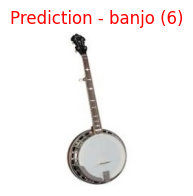

1/1 [==============================] - 0s 28ms/step


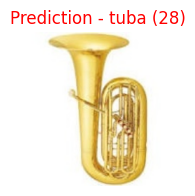

1/1 [==============================] - 0s 29ms/step


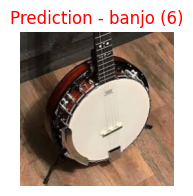

1/1 [==============================] - 0s 27ms/step


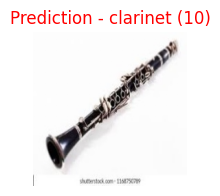

1/1 [==============================] - 0s 36ms/step


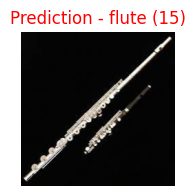

Predictions using model: Xception_saved
1/1 [==============================] - 1s 784ms/step


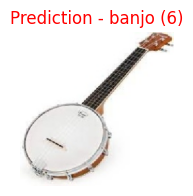

1/1 [==============================] - 0s 22ms/step


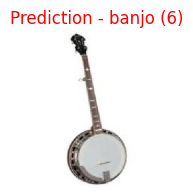

1/1 [==============================] - 0s 23ms/step


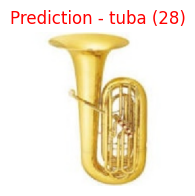

1/1 [==============================] - 0s 24ms/step


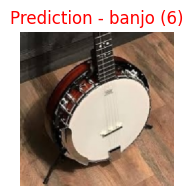

1/1 [==============================] - 0s 24ms/step


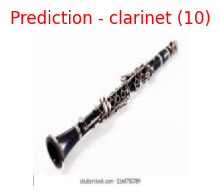

1/1 [==============================] - 0s 25ms/step


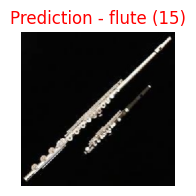

Predictions using model: InceptionV3_saved
1/1 [==============================] - 1s 1s/step


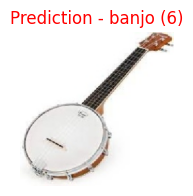

1/1 [==============================] - 0s 26ms/step


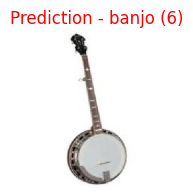

1/1 [==============================] - 0s 31ms/step


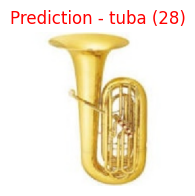

1/1 [==============================] - 0s 27ms/step


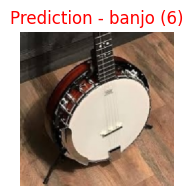

1/1 [==============================] - 0s 25ms/step


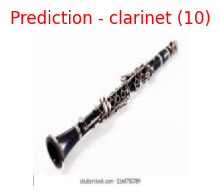

1/1 [==============================] - 0s 25ms/step


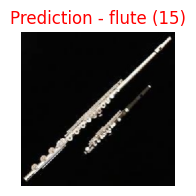

In [49]:
import csv
import os
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Example usage
filenames = [
    '/content/musical_instruments_dataset/6 test samples/1.jpg',
    '/content/musical_instruments_dataset/6 test samples/2.jpg',
    '/content/musical_instruments_dataset/test/tuba/1.jpg',
    '/content/musical_instruments_dataset/6 test samples/4.jpg',
    '/content/musical_instruments_dataset/test/clarinet/4.jpg',
    '/content/musical_instruments_dataset/test/flute/3.jpg'
]

def load_labels_mapping(labels_csv_path):
    classid_to_name = {}
    with open(labels_csv_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            classid_to_name[row['class_index']] = row['class']
    return classid_to_name

def predict_image(model, filenames, classid_to_name, target_size):
    for filename in filenames:
        img = image.load_img(filename, target_size=target_size)
        img_array = image.img_to_array(img)
        img_processed = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image and add batch dimension

        # Predict the class
        predictions = model.predict(img_processed)
        predicted_class_id = np.argmax(predictions, axis=1)[0]
        predicted_class_name = classid_to_name.get(str(predicted_class_id), "Unknown")

        plt.figure(figsize=(2, 2))
        plt.imshow(img_array / 255.0)  # Display the original image (normalized for display)
        plt.title(f"Prediction - {predicted_class_name} ({predicted_class_id})", size=12, color='red')
        plt.axis('off')  # Hide axes
        plt.show()

# Path to labels.csv
labels_csv_path = '/content/musical_instruments_dataset/class_dict.csv'

# Load the labels mapping
classid_to_name = load_labels_mapping(labels_csv_path)

# Directory containing the saved models
model_dir = '/content/saved_models'

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Determine the model name
        model_name = model_file.split('.')[0]

        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Set target size based on model
        if 'InceptionV3' in model_name or 'Xception' in model_name:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Predict and plot images using the loaded model
        print(f"Predictions using model: {model_name}")
        predict_image(model, filenames, classid_to_name, target_size)
